# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import bokeh
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import csv
import os 
import requests as req
import json
import seaborn
import random

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_file = os.path.join("output","cities.csv")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
base_url = "http://api.openweathermap.org/data/2.5/weather"
units = "Imperial"


lat = []
temp = []
humidity = []
cloudiness = []
wind_speed = []
date = []
lng = []
cities_list = []
country_code = []
city_counter = 1
set_counter = 1


print('Beginning Data Retrieval')
print('-----------------------------')
for city in cities:
    print('Processing record '+str(city_counter)+' of set'+ str(set_counter)+"|"+city)
    city_counter +=1
    
    try:
        params = {
            'appid': weather_api_key,
            'units': units,
            'q': city
        }
                     
        # Getting Data for city_counter
        
        response = requests.get(base_url, params=params).json()
       
       
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        date.append(response["dt"])
        country_code.append(response['sys']['country'])
        cities_list.append(city)
    except KeyError:
        print("City not found. Skipping...")
        continue

    if city_counter >= 50:
        time.sleep(10)
        city_counter = 0
        set_counter += 1
        
print('-----------------------------')
print('Data Retrieval Complete') 
print('-----------------------------')


Beginning Data Retrieval
-----------------------------
Processing record 1 of set1|mataura
Processing record 2 of set1|sahuaripa
Processing record 3 of set1|sindand
City not found. Skipping...
Processing record 4 of set1|tessalit
Processing record 5 of set1|mecca
Processing record 6 of set1|taolanaro
City not found. Skipping...
Processing record 7 of set1|bredasdorp
Processing record 8 of set1|rikitea
Processing record 9 of set1|hobart
Processing record 10 of set1|mandalgovi
Processing record 11 of set1|upernavik
Processing record 12 of set1|anadyr
Processing record 13 of set1|valparaiso
Processing record 14 of set1|maceio
Processing record 15 of set1|warrington
Processing record 16 of set1|nguiu
City not found. Skipping...
Processing record 17 of set1|cabo san lucas
Processing record 18 of set1|pilar
Processing record 19 of set1|busselton
Processing record 20 of set1|sao felix do xingu
Processing record 21 of set1|punta arenas
Processing record 22 of set1|kidal
Processing record 23 of

Processing record 48 of set4|alofi
Processing record 49 of set4|port lincoln
Processing record 0 of set5|poum
Processing record 1 of set5|barentsburg
City not found. Skipping...
Processing record 2 of set5|rafraf
Processing record 3 of set5|tuktoyaktuk
Processing record 4 of set5|liloan
Processing record 5 of set5|te anau
Processing record 6 of set5|namanga
Processing record 7 of set5|kamenskoye
City not found. Skipping...
Processing record 8 of set5|natal
Processing record 9 of set5|bolshoye sorokino
City not found. Skipping...
Processing record 10 of set5|diego de almagro
Processing record 11 of set5|itaituba
Processing record 12 of set5|saint george
Processing record 13 of set5|port elizabeth
Processing record 14 of set5|tabou
Processing record 15 of set5|kalengwa
Processing record 16 of set5|kailua
Processing record 17 of set5|nanortalik
Processing record 18 of set5|dhidhdhoo
Processing record 19 of set5|rincon de la victoria
Processing record 20 of set5|urdzhar
City not found. Ski

Processing record 6 of set9|bograd
Processing record 7 of set9|ponta delgada
Processing record 8 of set9|lieksa
Processing record 9 of set9|itacoatiara
Processing record 10 of set9|trairi
Processing record 11 of set9|marrakesh
Processing record 12 of set9|chara
Processing record 13 of set9|high level
Processing record 14 of set9|hami
Processing record 15 of set9|shimoda
Processing record 16 of set9|kitgum
Processing record 17 of set9|oyek
Processing record 18 of set9|grindavik
Processing record 19 of set9|general roca
Processing record 20 of set9|bengkulu
Processing record 21 of set9|kruisfontein
Processing record 22 of set9|zhicheng
Processing record 23 of set9|samusu
City not found. Skipping...
Processing record 24 of set9|argalasti
Processing record 25 of set9|bardiyah
Processing record 26 of set9|ribeira brava
Processing record 27 of set9|mattru
Processing record 28 of set9|fairbanks
Processing record 29 of set9|cockburn town
Processing record 30 of set9|rochegda
Processing record 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [23]:
lng


[168.86,
 -109.23,
 1.01,
 39.83,
 20.04,
 -134.97,
 147.33,
 106.27,
 -56.15,
 177.48,
 -71.63,
 -35.74,
 -2.58,
 -109.91,
 -35.96,
 115.33,
 -51.99,
 -70.92,
 1.41,
 -2.36,
 -73.82,
 113.5,
 -57.56,
 -28.7,
 -68.3,
 -52.33,
 -156.79,
 -90.35,
 2.65,
 -50.01,
 21.55,
 112.93,
 -159.78,
 161.3,
 -175.2,
 -34.86,
 -75.38,
 -67.67,
 150.8,
 -105.47,
 -73.41,
 -79.24,
 73.08,
 -151.75,
 -73.65,
 6.74,
 27.27,
 120.32,
 -8.87,
 170.31,
 80.55,
 -55.08,
 -46.03,
 134.08,
 -114.35,
 -149.44,
 -117.65,
 147.06,
 12.44,
 14.28,
 -156.47,
 -80.61,
 -73.97,
 11.3,
 111.7,
 19.23,
 -17.92,
 57.53,
 36.98,
 148.25,
 -69.36,
 140.83,
 26.89,
 178.42,
 -55.22,
 -120.46,
 -97.86,
 -125.24,
 -1.76,
 27.25,
 10.25,
 -53.46,
 -124.16,
 18.42,
 -79.52,
 161.92,
 -5.8,
 88.17,
 44.13,
 35.38,
 -77.66,
 -77.06,
 94.42,
 15.16,
 43.28,
 -159.32,
 -17.1,
 139.5,
 97.2,
 -12.51,
 -70.76,
 23.37,
 -17.34,
 -122.7,
 24.05,
 101.5,
 117.13,
 -65.1,
 15.64,
 102.5,
 27.91,
 175.52,
 168.33,
 -3.53,
 19.89,
 124.6

In [16]:
print(len(cities_list), len(temp), len(humidity),len(cloudiness), len(lat), len(date), len(wind_speed),len(country_code))

556 556 556 556 556 556 556 556


In [24]:
import datetime
weather_df = pd.DataFrame(columns = ['City Name','Country','Date','Latitude','Langitude','Temperature (F)','Humidity (%)','Cloudiness (%)','Wind Speed (MPH)'])
weather_df["Latitude"]=lat
weather_df["Langitude"]= lng
weather_df["Temperature (F)"]=temp
weather_df["Humidity (%)"]=humidity
weather_df["Cloudiness (%)"]=cloudiness
weather_df["Wind Speed (MPH)"]=wind_speed
weather_df["Date"]=date
weather_df["Country"]=country_code
weather_df["City Name"] =cities_list
weather_df["Date"] = [datetime.datetime.utcfromtimestamp(date) for date in weather_df["Date"]]
output_file = os.path.join("output_data","cities.csv")
weather_df.to_csv(output_file)
weather_df

,City Name,Country,Date,Latitude,Langitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (MPH)
0,mataura,NZ,2020-04-11 01:58:10,-46.19,168.86,68.00,65,0,1.99
1,sahuaripa,MX,2020-04-11 02:01:37,29.05,-109.23,64.35,22,0,3.69
2,tessalit,ML,2020-04-11 02:01:37,20.20,1.01,78.96,14,40,7.61
3,mecca,SA,2020-04-11 02:00:02,21.43,39.83,69.04,28,81,7.29
4,bredasdorp,ZA,2020-04-11 02:01:37,-34.53,20.04,59.00,93,100,1.12
...,...,...,...,...,...,...,...,...,...
551,houma,US,2020-04-11 02:04:07,29.60,-90.72,64.62,63,1,5.82
552,riosucio,CO,2020-04-11 02:04:07,5.42,-75.70,62.53,57,100,1.25
553,ahuimanu,US,2020-04-11 02:03:23,21.44,-157.84,79.84,58,90,5.82
554,sao miguel do araguaia,BR,2020-04-11 02:00:34,-13.28,-50.16,73.38,85,2,1.63


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

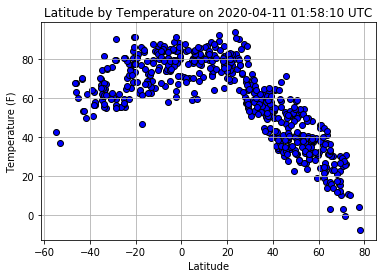

In [26]:

Latitude_city = weather_df["Latitude"]
tempeture_city = weather_df["Temperature (F)"]
date_city = weather_df["Date"]

plt.scatter(Latitude_city,tempeture_city,edgecolors="black",facecolors="blue")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title(f"Latitude by Temperature on {date_city[0]} UTC")
plt.savefig("output_data/Fig1.png")
plt.grid()
plt.show()

#### Latitude vs. Humidity Plot

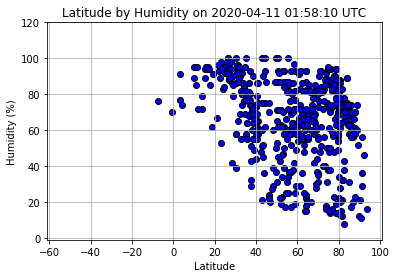

In [37]:
humidity_city =weather_df["Humidity (%)"]
plt.scatter(tempeture_city,humidity_city,edgecolors="black",facecolors="blue")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Latitude by Humidity on {date_city[0]} UTC")
plt.grid()
plt.xlim(-61,101)
plt.ylim(-1,120)
plt.savefig("output_data/Fig2.png")

plt.show()

#### Latitude vs. Cloudiness Plot

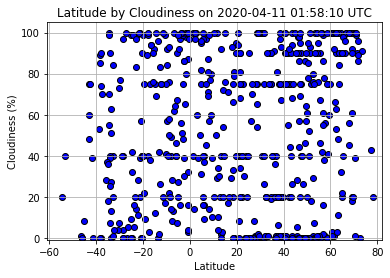

In [40]:
cloudiness_city = weather_df["Cloudiness (%)"]

plt.scatter(Latitude_city,cloudiness_city,edgecolors="black",facecolors="blue")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Latitude by Cloudiness on {date_city[0]} UTC")
plt.grid()
plt.xlim(-61,82)
plt.ylim(-1,105)
plt.savefig("output_data/Fig3.png")
plt.show()

#### Latitude vs. Wind Speed Plot

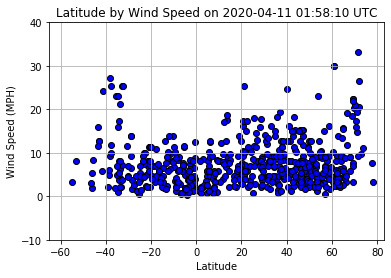

In [45]:
windspeed_city =  weather_df["Wind Speed (MPH)"]

plt.scatter(Latitude_city,windspeed_city,edgecolors="black",facecolors="blue")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.title(f"Latitude by Wind Speed on {date_city[0]} UTC")
plt.grid()
plt.xlim(-65,83)
plt.ylim(-10,40)
plt.savefig("output_data/Fig4.png")
plt.show()

## Linear Regression

In [62]:
# OPTIONAL: Create a function to create Linear Regression plots
def linearregression(x_values,y_values,x_label,y_label,x_annotate,y_annotate):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_annotate,y_annotate),fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xlim(min(x_values)-5,max(x_values)+5)
    plt.ylim(min(y_values)-5,max(y_values)+5)
    if x_annotate >= 0:
        hemisphere_name = "Northern"
    else:
        hemisphere_name = "Southern"
    plt.title(f'{x_label} vs. {y_label} in the {hemisphere_name} Hemisphere')
    print(f"The r-squared is: {round(rvalue**2,2)}")
    print(line_eq)
    plt.show()

In [63]:
plt.annotate?


In [64]:
# Create Northern and Southern Hemisphere DataFrames
Northern = weather_df.loc[weather_df["Latitude"]>=0,:]
Southern = weather_df.loc[weather_df["Latitude"]<0,:]

#Creating series for variables in the northern hemisphere
Northern_lat = Northern["Latitude"]
Northern_temp = Northern["Temperature (F)"]
Northern_hum = Northern["Humidity (%)"]
Northern_cloud = Northern["Cloudiness (%)"]
Northern_wind = Northern["Wind Speed (MPH)"]

#Creating series for variables in the southern hemisphere
Southern_lat = Southern["Latitude"]
Southern_temp = Southern["Temperature (F)"]
Southern_hum = Southern["Humidity (%)"]
Southern_cloud = Southern["Cloudiness (%)"]
Southern_wind = Southern["Wind Speed (MPH)"]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.81
y = -1.0x + 91.71


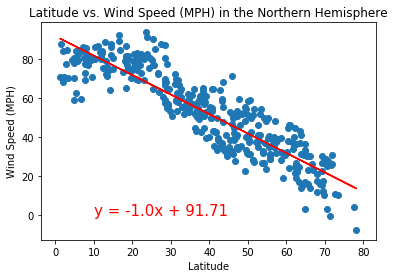

In [65]:
linearregression(Northern_lat,Northern_temp,"Latitude","Wind Speed (MPH)",10,0)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.39
y = 0.51x + 81.98


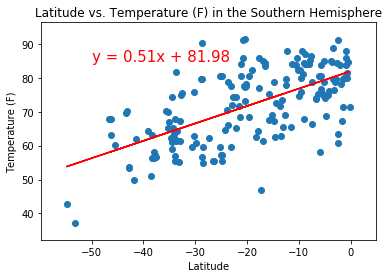

In [66]:
linearregression(Southern_lat,Southern_temp,"Latitude", "Temperature (F)",-50,85)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.08
y = 0.35x + 50.92


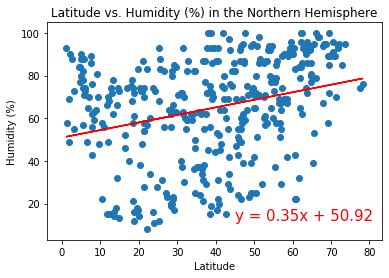

In [67]:
linearregression(Northern_lat,Northern_hum,"Latitude","Humidity (%)",45,12)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.09
y = 0.38x + 77.9


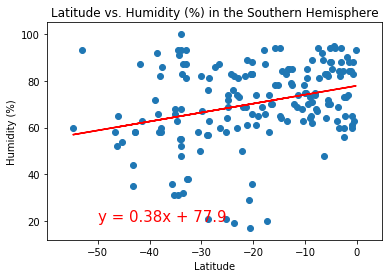

In [68]:
linearregression(Southern_lat,Southern_hum,"Latitude","Humidity (%)",-50,20)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.01
y = 0.2x + 43.19


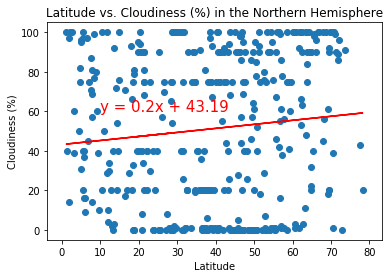

In [69]:
linearregression(Northern_lat,Northern_cloud,"Latitude","Cloudiness (%)",10,60)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.07
y = 0.71x + 65.44


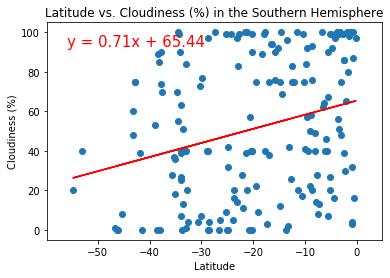

In [70]:
linearregression(Southern_lat,Southern_cloud,"Latitude","Cloudiness (%)",-56,93)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.04
y = 0.05x + 5.93


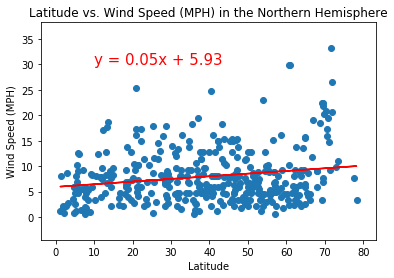

In [71]:
linearregression(Northern_lat,Northern_wind,"Latitude","Wind Speed (MPH)",10,30)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1
y = -0.12x + 4.45


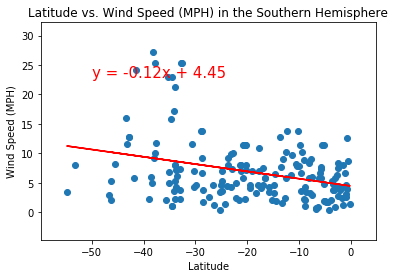

In [72]:
linearregression(Southern_lat,Southern_wind,"Latitude","Wind Speed (MPH)",-50,23)